<a href="https://colab.research.google.com/github/BBlopusy/machinelearningstudies/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

In [11]:
import pandas as pd
import numpy as np
from scipy.spatial import KDTree #ogarnie nam algorytm KNN
from sklearn.metrics import mean_absolute_error #średni błąd bezwzgledny, policzymy dzięki
#temu o ile w naszym przypadku w dolarach są błędne prognozy 
import random
import matplotlib.pyplot as plt



## Pobranie danych i ich przygotowanie
**!wget** to linuksowe polecenie ściągające plik z sieci

In [12]:
!wget https://github.com/betacord/ML/raw/master/lab1/data/data.csv

--2023-04-09 21:20:41--  https://github.com/betacord/ML/raw/master/lab1/data/data.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv [following]
--2023-04-09 21:20:41--  https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7381541 (7.0M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   7.04M  --.-KB/s    in 0.04s   

2023-04-09 21:20:41 (174 MB/s) - ‘data.csv.2’ saved [7381541/7381541]



### Wczytanie danych 

In [13]:
houses = pd.read_csv('/content/data.csv')

In [14]:
houses

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,523000.0,6982,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,425000.0,5481,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,377000.0,6793,2,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,581000.0,7200,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


Wyświetlenie kolumn i wczytanie ich w czystej postaci tablicy numphy:

In [15]:
houses.columns.values

array(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'OtherView', 'WfntLocation', 'WfntFootage', 'WfntBank',
       'WfntPoorQuality', 'WfntRestrictedAccess', 'WfntAccessRights',
       'WfntProximityInfluence', 'TidelandShoreland', 'LotDepthFactor',
       'TrafficNoise', 'PowerLines', 'OtherNuisances', 'NbrBldgSites',
       'Contamination', 'AdjacentGolfFairway', 'AdjacentGreenbelt',
       'HistoricSite', 'CurrentUseDesignation', 'NativeGrowthProtEsmt',
       'Easements', 'OtherDesignation', 'DeedRestrictions',
       'DevelopmentRightsPurch', 'WaterProblems', 'TranspConcurrency',
       'OtherProblems', 'lat', 'long'], dtype=object)

### Selekcja atrybutów

Selekcja atrybutów, wybieramy te które nas interesują ⛱ 
Czyli wartość, wielkość działki, system nawadniający itd.
My wybierzemy dokładnie za radą ekspertów: wielkość działki i współrzędne geograficzne. Nie wpływają w sposób liniowy. Będziemy próbować przewidzieć wartość czyli AppraisedValue na podstawie SqFtlot i współrzednych geograficznych czyli lat i long. 


In [16]:
# wyodrębnienie atrybutu decyzyjnego
values = houses['AppraisedValue']
# usuwamy go z systemu decyjnego, tworząc w ten sposób system informacyjny
houses.drop('AppraisedValue',1, inplace=True) 
#wskazujemy czy chcemy usunąć po osi wierszy czy po osi kolumn, my wskazujemy że po osi kolumn
#dlatego dajemy w parametrze axis wartość: 1
#nie chcemy zwróconej kopi tej ramki tylko żeby została zastąpiona oryginalna parametrem inplance =True


<ipython-input-16-e2790199a246>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('AppraisedValue',1, inplace=True)


In [17]:
houses

,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,MtRainier,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,6542712,1,1,4,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,105850,2,1,3,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,1667,2,2,4,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,1872,2,2,4,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,3480,2,2,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,6982,2,2,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,5481,2,2,4,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,6793,2,2,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,7200,2,2,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


### **Normalizacja danych**
Mamy różne atrybuty i różne wartości np. w SqFtLot mamy duże i małe wartości, rozsrtrzelone mocno. Musimy przetransformować dane, pozmieniać wartości żeby różnice były mniejsze, żeby rozkłady prawdopodobieństwa do siebie się upodobniły ale jednocześnie, żeby zależności miedzy nimi dalej były te same.

In [18]:
houses = (houses - houses.mean()) / (houses.max() - houses.min()) 
#pomnijszamy przez wartość średnią i dzielimy przez różnicę wartości maksymalną i minimalną w całej ramce danych
houses = houses[['lat', 'long', 'SqFtLot']] #zostawiamy sobie te trzy atrybuty które nas interesują

In [19]:
houses
houses2=houses

### Podział na trenig i test
Trening 80% test 20% 


In [20]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*.2)))
train_rows = set(range(len(houses))) - set(test_rows) 

In [21]:
df_test = houses.loc[test_rows]
df_train = houses.drop(test_rows)

In [22]:
test_values = values.loc[test_rows] #indekser loc jak wyżej
train_values = values.loc[train_rows]

<ipython-input-22-5fb2b1cbe0e7>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


liczebność danych treningowych:

In [23]:
len(train_values)

41936

liczebność danych testowych:

In [24]:
len(test_values)

10484

## KNN implementujemy algorytm
Jak wejdziemy w źródło tego algorytmu klasy KDTree to jest tam odległość Minkowskiego, matematyka nauczyciela Einsteina 🦾

In [25]:
kdtree = KDTree(df_train) #tworzymy obiekt regresdora KNN

Następnie tworzymy funkcję, która przydzieli prognozę przekazanemu obiektowi na podstawie liczby najbliższych sąsiadów (parametr k).

In [26]:
def predict(query_point, k):#query_point czyli dla konkretnego wiersza z naszej bazy będziemy przydzielać predykcję
  _, idx = kdtree.query(query_point, k) #ta metoda zwraca nam dwie wartości 'd' i 'i'
  # gdzie d to tablica odległości do najbliższych obiektów, natomiast 'i' jest indeksami najbliższych sąsiadów
  # w tym przypadku nie korzystamy z pierwszej wartości, dajemy podkreślnik
  return np.mean(train_values.iloc[idx])

Dla wartości K (liczba najbliższych sąsiadów) równej 5 dokonujemy regresji obiektów pochodzących z systemu testowego, a następnie porównujemy wyniki z wynikami oryginalnymi przy użyciu funkcji średniego błędu bezwzględnego.

In [27]:
train_predicted_values = [] #pusta lista, miejsce na wartości które będą przewidywane
train_actual_values = []

#wstawimy na sztywno 5 najbliższych sąsiadów, później będziemy optymalizować
for _id, row in df_train.iterrows():
  prediction = predict(row, 5) 
  actual_value = train_values[_id]

  train_predicted_values.append(prediction)
  train_actual_values.append(actual_value)

właściwy wynik:

In [28]:
mae = mean_absolute_error(train_values, train_predicted_values)
f'Średni błąd bezwględny: {mae} $ '

'Średni błąd bezwględny: 60267.85086798932 $ '

😾48 minut 


###Zadnie-regresja KNN
(opracowanie własne)
polega na znalezioniu optymalnego K, dla średniego błedu bezwglednego. W przedziale K(3-29)
Przedstawienie tego na wykresie.

In [29]:
train_predicted_values = [] #pusta lista, miejsce na wartości które będą przewidywane
train_actual_values = []
listadlakibledu = []

for k in range(3,30):
  for _id, row in df_train.iterrows():
    prediction = predict(row, k) 
    actual_value = train_values[_id]

    train_predicted_values.append(prediction)
    train_actual_values.append(actual_value)
  blad = mean_absolute_error(train_predicted_values, train_actual_values)
  print(f'Wartosc sredniego bledu bezwzglednego na systemie treningowym dla {k} wynosi: {blad}')
  listadlakibledu.append((k,blad))
  

 

Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 3 wynosi: 52904.42168224596
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 4 wynosi: 55111.796006613244
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 5 wynosi: 56830.48096040527
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 6 wynosi: 58232.56568540951
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 7 wynosi: 59409.58679915881
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 8 wynosi: 60423.99509589064
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 9 wynosi: 61301.64023350342
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 10 wynosi: 62074.31510583209
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 11 wynosi: 62764.00617402549
Wartosc sredniego bledu bezwzglednego na systemie treningowym dla 12 wynosi: 63382.59881818022
Wartosc sredniego bledu bezwzglednego na systemie trenin

wyświetlenie najmniejszego błędu:

In [30]:
f'{min(listadlakibledu)}'

'(3, 52904.42168224596)'

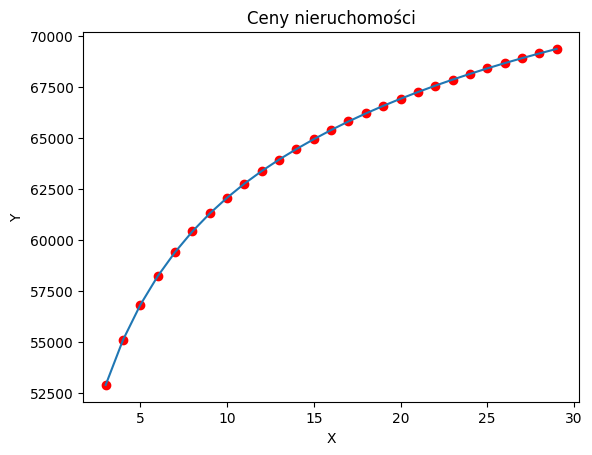

In [31]:
# konwersja krotek na dwie listy - jedną dla wartości x, drugą dla wartości y
x_values = [item[0] for item in listadlakibledu]
y_values = [item[1] for item in listadlakibledu]

# utworzenie wykresu liniowego
plt.plot(x_values, y_values)

# dodanie punktów dla każdej wartości x
plt.scatter(x_values, y_values, color='red')

# dodanie tytułu i etykiet osi
plt.title('Ceny nieruchomości')
plt.xlabel('X')
plt.ylabel('Y')

# wyświetlenie wykresu
plt.show()

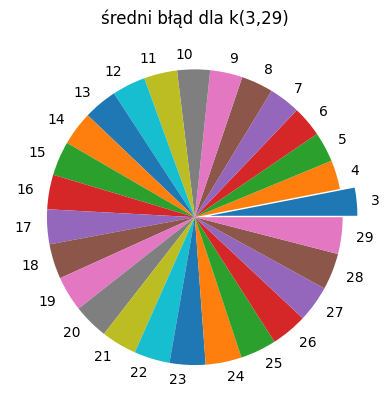

In [32]:
# utworzenie dwóch list - jednej dla wartości, drugiej dla etykiet
values = [item[1] for item in listadlakibledu]
labels = [item[0] for item in listadlakibledu]

# znajdowanie najmniejszej wartości i utworzenie listy explode
min_value = min(values)
explode = [0.1 if value == min_value else 0 for value in values]

# utworzenie wykresu kołowego procentowego
plt.pie(values, labels=labels, autopct='', explode=explode)

# dodanie tytułu
plt.title('średni błąd dla k(3,29)')

# wyświetlenie wykresu
plt.show()

### Dalsza część, szukanie optymalnych proporcji danych treningowych i testowych dla różnych k

Znaleźć "najlepszą" wartość K dla następujących podziałów na system treningowy i testowy:
60% system treningowy i 40% system testowy
65% system treningowy i 35% system testowy
70% system treningowy i 30% system testowy
75% system treningowy i 25% system testowy
80% system treningowy i 20 system testowy
🐌3:18


In [33]:

proporcje = [.4,.35,.3,.25,.2]
wyniki = []
for i in proporcje:
  houses = pd.read_csv('/content/data.csv')
  values = houses['AppraisedValue']
  houses.drop('AppraisedValue',1, inplace=True)
  houses = (houses - houses.mean()) / (houses.max() - houses.min()) 
  houses = houses[['lat', 'long', 'SqFtLot']]

  test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*i)))
  train_rows = set(range(len(houses))) - set(test_rows)

  df_test = houses.loc[test_rows]
  df_train = houses.drop(test_rows)
  
  test_values = values.loc[test_rows]
  train_values = values.loc[train_rows]
  kdtree = KDTree(df_train) 
  train_predicted_values = [] 
  train_actual_values = []
  listadlakibledu = []
  for k in range(3,30):
    for _id, row in df_train.iterrows():
      prediction = predict(row, k) 
      actual_value = train_values[_id]

      train_predicted_values.append(prediction)
      train_actual_values.append(actual_value)
    blad = mean_absolute_error(train_predicted_values, train_actual_values)
    wyniki.append((i,k,blad))    

<ipython-input-33-15b4e04c2f92>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('AppraisedValue',1, inplace=True)
<ipython-input-33-15b4e04c2f92>:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]
<ipython-input-33-15b4e04c2f92>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('AppraisedValue',1, inplace=True)
<ipython-input-33-15b4e04c2f92>:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]
<ipython-input-33-15b4e04c2f92>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('AppraisedV

In [37]:
f'{wyniki}'

'[(0.4, 3, 53441.63725677222), (0.4, 4, 55915.074097036755), (0.4, 5, 57746.772116240616), (0.4, 6, 59181.68526882233), (0.4, 7, 60350.55704211405), (0.4, 8, 61343.60813073814), (0.4, 9, 62220.38759142715), (0.4, 10, 62991.39863275374), (0.4, 11, 63682.68160081311), (0.4, 12, 64310.327047444676), (0.4, 13, 64885.096641326665), (0.4, 14, 65415.3774664763), (0.4, 15, 65909.7957667052), (0.4, 16, 66370.25905227433), (0.4, 17, 66806.11860444518), (0.4, 18, 67215.10025624283), (0.4, 19, 67598.73544126234), (0.4, 20, 67961.40243435484), (0.4, 21, 68303.58381894376), (0.4, 22, 68627.24502411245), (0.4, 23, 68935.42212835656), (0.4, 24, 69228.58593221052), (0.4, 25, 69506.833143503), (0.4, 26, 69773.66554849019), (0.4, 27, 70027.9437381153), (0.4, 28, 70272.72471106512), (0.4, 29, 70507.52430295228), (0.35, 3, 54377.06476291101), (0.35, 4, 56671.15303784032), (0.35, 5, 58416.73408775929), (0.35, 6, 59853.68063948483), (0.35, 7, 61084.2821823871), (0.35, 8, 62146.14792811209), (0.35, 9, 63050.8

In [40]:
f'{min(wyniki)}'

'(0.2, 3, 52685.272224341854)'